In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Load the dataset
series = pd.read_csv('dataset.csv', header=0, index_col=0, parse_dates=True).squeeze()

# Convert the series to a DataFrame
df = series.to_frame(name='Passengers')

# Split the data into training and testing sets
train_size = int(len(df) * 0.80)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Function to create dataset for supervised learning
def create_dataset(dataset, time_steps=1):
    X, y = [], []
    for i in range(len(dataset) - time_steps):
        X.append(dataset.iloc[i:(i + time_steps), 0].values)
        y.append(dataset.iloc[i + time_steps, 0])
    return np.array(X), np.array(y)

# Create supervised learning datasets
X_train, y_train = create_dataset(train, time_steps=12)
X_test, y_test = create_dataset(test, time_steps=12)

# Build the baseline model
baseline_model = Sequential()
baseline_model.add(Dense(10, activation='relu', input_dim=12))
baseline_model.add(Dense(1))
baseline_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the baseline model
baseline_model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1)

# Make predictions on training and validation sets
y_train_pred_baseline = baseline_model.predict(X_train).reshape(-1, 1)
y_test_pred_baseline = baseline_model.predict(X_test).reshape(-1, 1)

# Calculate RMSE for training and validation sets
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_baseline))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_baseline))

# Print RMSE
print(f'RMSE on Training Data (Baseline): {rmse_train}')
print(f'RMSE on Test Data (Baseline): {rmse_test}')

# Save the baseline model
baseline_model.save('baseline_model.keras')

Epoch 1/50
11/11 [==============================] - 2s 5ms/step - loss: 305259.8438
Epoch 2/50
11/11 [==============================] - 0s 3ms/step - loss: 233922.1875
Epoch 3/50
11/11 [==============================] - 0s 3ms/step - loss: 174745.6406
Epoch 4/50
11/11 [==============================] - 0s 3ms/step - loss: 128245.2266
Epoch 5/50
11/11 [==============================] - 0s 3ms/step - loss: 91194.2266
Epoch 6/50
11/11 [==============================] - 0s 3ms/step - loss: 63945.5898
Epoch 7/50
11/11 [==============================] - 0s 3ms/step - loss: 43717.1523
Epoch 8/50
11/11 [==============================] - 0s 3ms/step - loss: 28848.0332
Epoch 9/50
11/11 [==============================] - 0s 4ms/step - loss: 18843.6816
Epoch 10/50
11/11 [==============================] - 0s 3ms/step - loss: 11608.1982
Epoch 11/50
11/11 [==============================] - 0s 3ms/step - loss: 6841.4448
Epoch 12/50
11/11 [==============================] - 0s 3ms/step - loss: 4008.2300

In [5]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.metrics import mean_squared_error

# Function to create a Keras model
def create_model(neurons=10, hidden_layers=1):
    model = Sequential()
    model.add(Dense(neurons, input_dim=12, activation='relu'))

    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation='relu'))

    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Wrapper class for Keras model compatible with GridSearchCV
class KerasRegressorWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, neurons=10, hidden_layers=1, epochs=50, batch_size=32):
        self.neurons = neurons
        self.hidden_layers = hidden_layers
        self.epochs = epochs
        self.batch_size = batch_size
        self.model = None

    def fit(self, X, y):
        self.model = create_model(neurons=self.neurons, hidden_layers=self.hidden_layers)
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=0)
        return self

    def predict(self, X):
        return self.model.predict(X)

# Create supervised learning datasets (replace this with your actual data)
X_train, y_train = create_dataset(train, time_steps=12)
X_test, y_test = create_dataset(test, time_steps=12)

# Specify the parameters to search
param_grid = {'neurons': [35,40,45,50,55], 'hidden_layers': [1,2,3,4,5]}

# Create an instance of the wrapper class
keras_wrapper = KerasRegressorWrapper()

# Use GridSearchCV to find the best parameters
grid = GridSearchCV(estimator=keras_wrapper, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
grid_result = grid.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters: ", grid_result.best_params_)
print("Best score: ", -grid_result.best_score_)

# Get the best parameters
best_params = grid_result.best_params_
print(best_params)

# Train the advanced model with the best parameters
best_advanced_model = create_model(**best_params)
best_advanced_model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1)


# Make predictions on training and validation sets using the advanced model
y_train_pred_advanced =best_advanced_model.predict(X_train)
# Reshape predictions
y_train_pred_advanced = y_train_pred_advanced.reshape(-1, 1)
# Make predictions on training and validation sets using the advanced model
y_test_pred_advanced =best_advanced_model.predict(X_test)
# Reshape predictions
y_test_pred_advanced = y_test_pred_advanced.reshape(-1, 1)
# Calculate RMSE for training and validation sets
rmse_train_advanced = np.sqrt(mean_squared_error(y_train, y_train_pred_advanced))
print(f'RMSE on Training Data (Advanced Model): {rmse_train_advanced}')
# Calculate RMSE for training and validation sets
rmse_test_advanced = np.sqrt(mean_squared_error(y_test, y_test_pred_advanced))
print(f'RMSE on Training Data (Advanced Model): {rmse_test_advanced}')
# Save the trained advanced model
best_advanced_model.save('best_advanced_model.keras')


1/1 [==============================] - 0s 220ms/step
Best parameters:  {'hidden_layers': 4, 'neurons': 55}
Best score:  339.45177679781114
{'hidden_layers': 4, 'neurons': 55}
Epoch 1/50
11/11 [==============================] - 2s 4ms/step - loss: 47633.5312
Epoch 2/50
11/11 [==============================] - 0s 7ms/step - loss: 6197.6318
Epoch 3/50
11/11 [==============================] - 0s 4ms/step - loss: 3380.1592
Epoch 4/50
11/11 [==============================] - 0s 3ms/step - loss: 1573.5580
Epoch 5/50
11/11 [==============================] - 0s 4ms/step - loss: 1326.1541
Epoch 6/50
11/11 [==============================] - 0s 4ms/step - loss: 1044.9138
Epoch 7/50
11/11 [==============================] - 0s 4ms/step - loss: 906.1599
Epoch 8/50
11/11 [==============================] - 0s 3ms/step - loss: 770.6849
Epoch 9/50
11/11 [==============================] - 0s 4ms/step - loss: 695.4783
Epoch 10/50
11/11 [==============================] - 0s 4ms/step - loss: 576.5536
Epoch 1

1/1 [==============================] - 0s 65ms/step
RMSE on Training Data (Advanced Model): 10.912840598501537
RMSE on Training Data (Advanced Model): 35.32747748972483


test on the whole dataset 

In [6]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import load_model

# Define the create_dataset function
def create_dataset(dataset, time_steps=1):
    X, y = [], []
    for i in range(len(dataset) - time_steps):
        X.append(dataset.iloc[i:(i + time_steps)].values)
        y.append(dataset.iloc[i + time_steps])
    return np.array(X), np.array(y)

# Load the validation series from CSV
dataset= pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True).squeeze()
print(dataset)
# Load the saved advanced model
loaded_advanced_model = load_model('best_advanced_model.keras')
# Create the dataset for validation
X_t, y_t = create_dataset(dataset, time_steps=12)
# Make predictions on the validation set
predictions_t = loaded_advanced_model.predict(X_t)
# Calculate RMSE for the validation set
rmse_t = np.sqrt(mean_squared_error(y_t, predictions_t))
# Print RMSE
print(f'RMSE on dataset Data: {rmse_t}')

0
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1958-08-01    505
1958-09-01    404
1958-10-01    359
1958-11-01    310
1958-12-01    337
Name: 1, Length: 120, dtype: int64
4/4 [==============================] - 0s 7ms/step
RMSE on dataset Data: 15.914115703482922


0
1959-01-01    360
1959-02-01    342
1959-03-01    406
1959-04-01    396
1959-05-01    420
1959-06-01    472
1959-07-01    548
1959-08-01    559
1959-09-01    463
1959-10-01    407
1959-11-01    362
1959-12-01    405
1960-01-01    417
1960-02-01    391
1960-03-01    419
1960-04-01    461
1960-05-01    472
1960-06-01    535
1960-07-01    622
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: 1, dtype: int64
[[360 342 406 396 420 472 548 559 463 407 362 405]
 [342 406 396 420 472 548 559 463 407 362 405 417]
 [406 396 420 472 548 559 463 407 362 405 417 391]
 [396 420 472 548 559 463 407 362 405 417 391 419]
 [420 472 548 559 463 407 362 405 417 391 419 461]
 [472 548 559 463 407 362 405 417 391 419 461 472]
 [548 559 463 407 362 405 417 391 419 461 472 535]
 [559 463 407 362 405 417 391 419 461 472 535 622]
 [463 407 362 405 417 391 419 461 472 535 622 606]
 [407 362 405 417 391 419 461 472 535 622 606 508]
 [362 405 417 391 419 461 472 535 

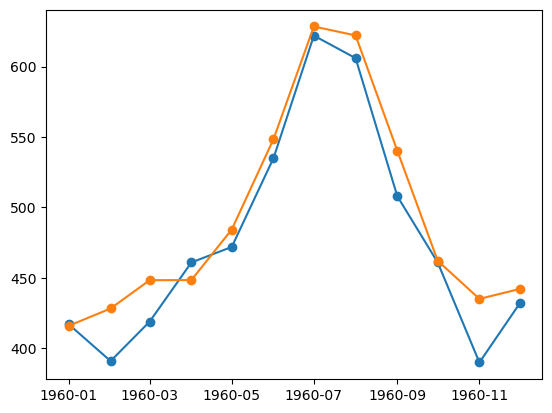

In [7]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import load_model


# Load the validation series from CSV
validation = pd.read_csv('validation.csv', header=None, index_col=0, parse_dates=True).squeeze()
print(validation)

# Load the saved advanced model
loaded_advanced_model = load_model('best_advanced_model.keras')

# Create the dataset for validation
X_val, y_val = create_dataset(validation, time_steps=12)
print(X_val,y_val)

# Make predictions on the validation set
predictions = loaded_advanced_model.predict(X_val)
for i in range(len(y_val)):
        print('> Predicted=%.3f, Expected=%.3f' % (predictions[i],y_val[i]))

# Calculate RMSE for the validation set
rmse = np.sqrt(mean_squared_error(y_val, predictions))

# Print RMSE
print(f'RMSE on Validation Data: {rmse}')

# Plot all the actual values
plt.plot(validation.index[12:], y_val, label='Actual Values', marker='o')

# Plot all the predicted values
plt.plot(validation.index[12:], predictions, label='Predictions', marker='o')